<a href="https://colab.research.google.com/github/RatanNarayanHegde/GoogleColabFiles/blob/master/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the fastai library , that is the best wrapper library on top of pytorch


In [0]:
from fastai.vision import *

loading the dataset from local pc to colab

In [0]:
folder = 'cat'
file ='cats.csv'

In [0]:
folder = 'dog'
file ='dogs.csv'

In [0]:
path = Path('data/pets')
dest = path/folder
dest.mkdir(parents=True,exist_ok=True)

In [10]:
path.ls()

[PosixPath('data/pets/dogs.csv'),
 PosixPath('data/pets/cat'),
 PosixPath('data/pets/dog'),
 PosixPath('data/pets/cats.csv')]

In [0]:
classes = ['dogs','cats']

In [12]:
download_images(path/file, dest, max_pics=200)

In [13]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

dogs
cats


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [16]:
data.classes

['cat', 'dog']

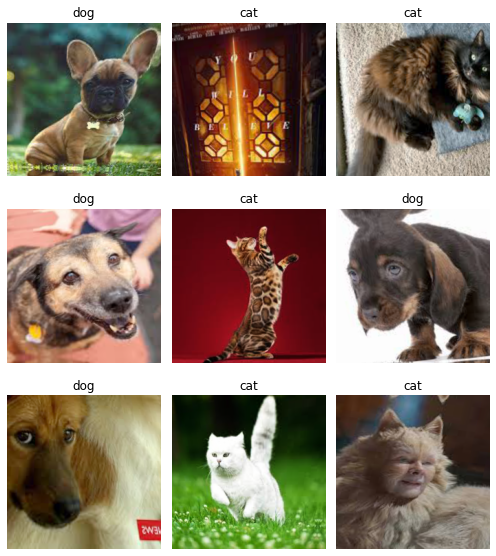

In [17]:
data.show_batch(rows=3, figsize=(7,8))

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['cat', 'dog'], 2, 192, 48)

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.194609,0.828149,0.312500,01:12
1,0.704754,1.231882,0.291667,01:08
2,0.501057,0.710968,0.166667,01:08
3,0.387367,0.445554,0.125000,01:08


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()


In [23]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: ignored

In [24]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.071199,0.590468,0.166667,01:37
1,0.054469,0.409856,0.104167,01:38


In [25]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.039868,0.224621,0.083333,01:37
1,0.035544,0.108293,0.041667,01:38
2,0.026730,0.078793,0.062500,01:37
3,0.019735,0.072593,0.062500,01:37
